In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [20]:
nodes, edges = [], []
degrees = []
for i in range(1, 50):
    graph_path = f"../../graphs/tx_graph/tx_transaction_graph_timestamp_{i}.pkl"

    with open(graph_path, "rb") as f:
        G = pickle.load(f)
        nodes.append(G.number_of_nodes())
        edges.append(G.number_of_edges())
        degrees.append(np.array(list(G.degree()))[:, 1].mean())

    print(G.number_of_nodes(), G.number_of_edges(), [np.array(list(G.degree()))[:, 1].mean()])

7880 9164 [np.float64(2.3258883248730964)]
4544 5241 [np.float64(2.3067781690140845)]
6621 8316 [np.float64(2.512007249660172)]
5693 8180 [np.float64(2.873704549446689)]
6803 8623 [np.float64(2.5350580626194326)]
4328 5242 [np.float64(2.422365988909427)]
6048 7253 [np.float64(2.398478835978836)]
4457 5186 [np.float64(2.3271258694188917)]
4996 5939 [np.float64(2.377502001601281)]
6727 8588 [np.float64(2.5532927010554483)]
4296 4656 [np.float64(2.1675977653631286)]
2047 2213 [np.float64(2.16218856863703)]
4528 4827 [np.float64(2.1320671378091873)]
2022 2078 [np.float64(2.055390702274975)]
3639 3823 [np.float64(2.1011266831547126)]
2975 3120 [np.float64(2.0974789915966388)]
3385 3650 [np.float64(2.156573116691285)]
1976 2115 [np.float64(2.1406882591093117)]
3506 3838 [np.float64(2.1893896177980605)]
4291 4755 [np.float64(2.2162666045210906)]
3537 3959 [np.float64(2.238620299689002)]
5894 7014 [np.float64(2.380047505938242)]
4165 4584 [np.float64(2.201200480192077)]
4592 5124 [np.float64(2

In [21]:
import numpy as np

np.mean(nodes), np.mean(edges), np.mean(nodes)/np.mean(edges), np.mean(degrees)

(np.float64(4158.551020408163),
 np.float64(4782.755102040816),
 np.float64(0.8694885963602227),
 np.float64(2.2579089086991737))

In [11]:
lens = []
ids = []
for i in range(1, 50):
    graph_path = f"graphlets/tx_{i}_dedup_6.graphlets"

    with open(graph_path, "rb") as f:
        graphlets = np.loadtxt(f)
        lens.append(len(graphlets))
        ids.append(np.unique(graphlets[:, 0]).shape[0])

Text(0, 0.5, 'Number of graphlets')

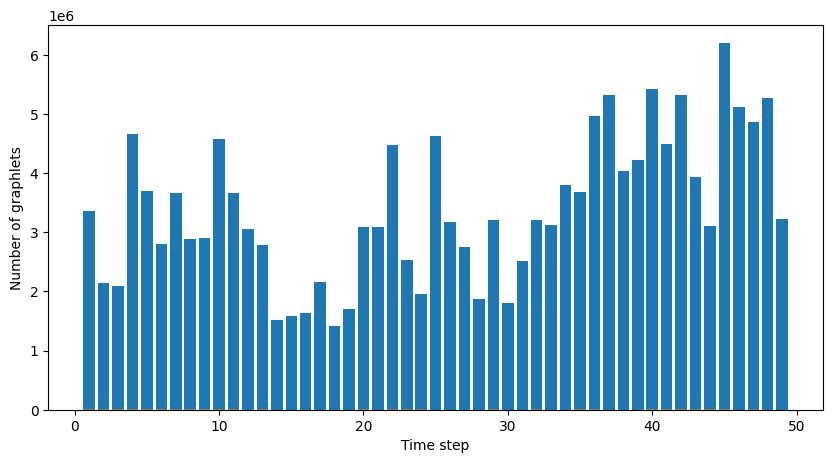

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 50), lens)
p
plt.bar(range(1, 50), nodes, alpha=0.5)
plt.xlabel("Timestamp")
plt.ylabel("Number of graphlets")

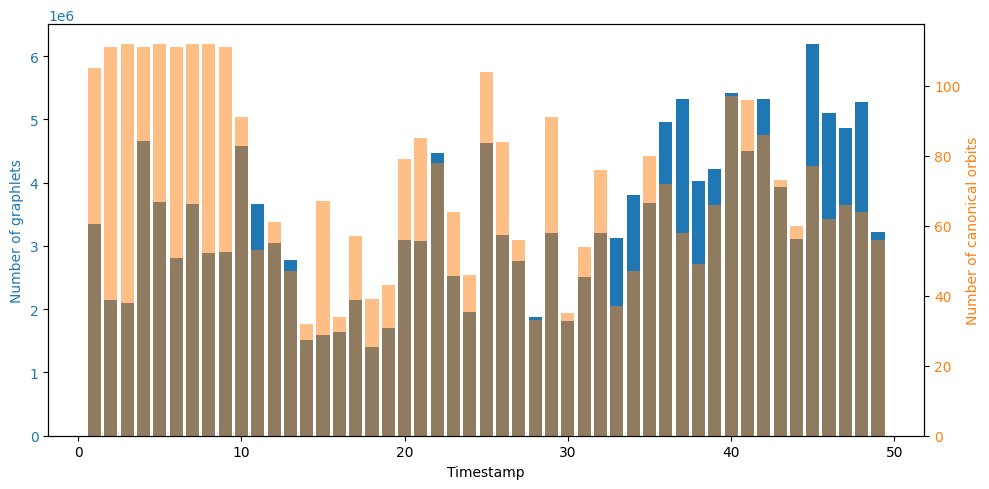

In [28]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# First y-axis (graphlets)
ax1.bar(range(1, 50), lens, color='C0')
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Number of graphlets", color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Second y-axis (nodes)
ax2 = ax1.twinx()
ax2.bar(range(1, 50), ids, color='C1', alpha=0.5)
ax2.set_ylabel("Number of canonical orbits", color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.tight_layout()
plt.show()


In [ ]:
list(G.nodes(data=True))[0]

(24847, 93135)

Check some features at random

In [4]:
nodes = list(G.nodes(data=True))
for i, n in enumerate(nodes):
    if type(n[1]["num_txs_as_sender"]) not in [float, int]:
        print(n)

In [5]:
edges = list(G.edges(data=True))
for i, e in enumerate(edges):
    if type(e[2]["Local_feature_1"]) != float:
        print(e)

Some graph analysis